# Analysis of Key Variables

After the preliminary analysis, we'll try to apply our findings to a much larger data set : all the ATP Singles (World Tour, Challenger, Futures) matches since 1970. For this step, we have two objectives :
1. Identify all the key variables we will take into account to build our models (we will concern ourselves with their 'weights' when we build the models)
2. Identify the data sets for which these variables can actually be exploited (i.e format - maybe Futures matches are too volatile to predict, and timeframe - maybe the game has evolved too much since 1990)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob

ATP = pd.concat(map(pd.read_csv, glob.glob('ATP_matches/*.csv')))                   # Dataframe containing all ATP World Tour matches from (1968) 1991 to 2021
Challenger = pd.concat(map(pd.read_csv, glob.glob('Challenger_matches/*.csv')))     # Dataframe containing all ATP Challenger matches from (1978) 2010 to 2021
# Futures = pd.concat(map(pd.read_csv, glob.glob('Futures_matches/*.csv')))         # (Dataframe containing all Futures matches from 1991 to 2021)

display(ATP.head(10))
display(Challenger.head(10))

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,NaN,NaN,...,62.0,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,NaN,Q,...,41.0,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,NaN,NaN,...,37.0,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,8.0,NaN,...,45.0,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,NaN,NaN,...,41.0,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN
5,1991-339,Adelaide,Hard,32,A,19901231,6,102148,NaN,NaN,...,45.0,20.0,8.0,9.0,10.0,16.0,62.0,NaN,59.0,NaN
6,1991-339,Adelaide,Hard,32,A,19901231,7,101900,NaN,NaN,...,22.0,16.0,8.0,8.0,3.0,7.0,51.0,NaN,74.0,NaN
7,1991-339,Adelaide,Hard,32,A,19901231,8,101320,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,188.0,NaN
8,1991-339,Adelaide,Hard,32,A,19901231,9,101529,6.0,NaN,...,42.0,27.0,13.0,10.0,7.0,9.0,42.0,NaN,67.0,NaN
9,1991-339,Adelaide,Hard,32,A,19901231,10,101332,NaN,NaN,...,69.0,52.0,25.0,17.0,5.0,9.0,66.0,NaN,228.0,NaN


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2010-1536,Madrid Masters,Clay,56,M,20100509,701,103428,1,NaN,...,37.0,23.0,10.0,10.0,4.0,8.0,51.0,839.0,226.0,205.0
1,2010-1536,Madrid Masters,Clay,56,M,20100509,702,104262,NaN,NaN,...,46.0,30.0,10.0,10.0,11.0,15.0,263.0,171.0,129.0,405.0
2,2010-1536,Madrid Masters,Clay,56,M,20100509,703,104739,NaN,NaN,...,47.0,34.0,10.0,12.0,4.0,8.0,228.0,205.0,227.0,205.0
3,2010-1536,Madrid Masters,Clay,56,M,20100509,704,103926,NaN,WC,...,45.0,27.0,15.0,10.0,5.0,8.0,315.0,134.0,127.0,409.0
4,2010-1536,Madrid Masters,Clay,56,M,20100509,705,105053,3,NaN,...,33.0,20.0,7.0,8.0,7.0,12.0,59.0,764.0,245.0,192.0
5,2010-1536,Madrid Masters,Clay,56,M,20100509,706,103835,12,NaN,...,28.0,21.0,10.0,9.0,2.0,5.0,123.0,422.0,154.0,317.0
6,2010-1536,Madrid Masters,Clay,56,M,20100509,707,105238,4,NaN,...,32.0,15.0,12.0,8.0,4.0,7.0,62.0,734.0,190.0,245.0
7,2010-1536,Madrid Masters,Clay,56,M,20100509,708,103888,8,NaN,...,43.0,23.0,8.0,8.0,5.0,9.0,98.0,540.0,1088.0,5.0
8,2010-1536,Madrid Masters,Clay,56,M,20100509,709,103294,NaN,NaN,...,56.0,35.0,13.0,14.0,4.0,9.0,140.0,361.0,69.0,705.0
9,2010-1536,Madrid Masters,Clay,56,M,20100509,710,103169,10,NaN,...,33.0,18.0,5.0,7.0,6.0,11.0,103.0,516.0,252.0,185.0


In [31]:
print(ATP.shape)            # 98 976 matches
print(Challenger.shape)     # 86 327 matches

(98976, 49)
(86327, 49)


## Quality of Data & Data Cleanup
### 1. ATP

In [32]:
ATP = ATP.drop(['tourney_id', 'draw_size', 'match_num', 'round', 'winner_id', 'winner_seed', 'winner_entry', 'loser_id', 'loser_seed', 'loser_entry'], axis=1)

,tourney_date,winner_ht,winner_age,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,9.897600e+04,94616.000000,98918.000000,90815.000000,98849.000000,98976.000000,86495.00000,89099.000000,89099.000000,89099.000000,...,89099.000000,89099.000000,89099.000000,89100.000000,89099.000000,89099.000000,97936.000000,96944.000000,96681.000000,95692.000000
mean,2.004860e+07,185.596305,25.773312,185.107009,25.869153,3.445967,103.16490,6.507694,2.744565,78.081404,...,47.930482,31.834678,15.014422,12.193984,4.814532,8.753476,80.949416,1407.302009,119.303121,880.460289
std,8.810000e+04,6.733973,3.758959,6.664970,3.882046,0.832499,39.49285,5.335709,2.369079,29.565277,...,19.402418,14.460583,7.233562,4.131365,3.275234,4.132122,134.820689,1745.516207,179.554935,986.747534
min,1.990123e+07,160.000000,14.351814,160.000000,14.513347,3.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.997061e+07,180.000000,22.976044,180.000000,23.022587,3.000000,75.00000,3.000000,1.000000,56.000000,...,34.000000,22.000000,10.000000,9.000000,2.000000,6.000000,18.000000,522.000000,37.000000,390.000000
50%,2.004093e+07,185.000000,25.503080,185.000000,25.667351,3.000000,96.00000,5.000000,2.000000,73.000000,...,44.000000,29.000000,14.000000,11.000000,4.000000,8.000000,46.000000,870.000000,71.000000,647.000000
75%,2.012083e+07,190.000000,28.284736,190.000000,28.484600,3.000000,125.00000,9.000000,4.000000,94.000000,...,58.000000,39.000000,19.000000,15.000000,7.000000,11.000000,89.000000,1575.000000,119.000000,1028.000000
max,2.021100e+07,211.000000,42.792608,211.000000,46.036961,5.000000,1266.00000,113.000000,26.000000,491.000000,...,328.000000,284.000000,101.000000,91.000000,28.000000,35.000000,2101.000000,16950.000000,2159.000000,16950.000000


tourney_name              0
surface                 198
tourney_level             0
tourney_date              0
winner_name               0
winner_hand              18
winner_ht              4360
winner_ioc                0
winner_age               58
loser_name                0
loser_hand               50
loser_ht               8161
loser_ioc                 0
loser_age               127
score                     0
best_of                   0
minutes               12481
w_ace                  9877
w_df                   9877
w_svpt                 9877
w_1stIn                9877
w_1stWon               9877
w_2ndWon               9877
w_SvGms                9876
w_bpSaved              9877
w_bpFaced              9877
l_ace                  9877
l_df                   9877
l_svpt                 9877
l_1stIn                9877
l_1stWon               9877
l_2ndWon               9877
l_SvGms                9876
l_bpSaved              9877
l_bpFaced              9877
winner_rank         

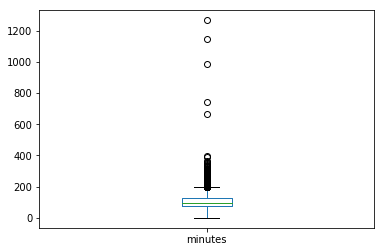

In [33]:
display(ATP.describe()) # Quick summary of the data
display(ATP.isnull().sum()) # Counting missing values

fig, ax = plt.subplots()
ATP['minutes'].plot.box()
plt.show()

In [34]:
# NB : A lot of the missing values come from Davis Cup matches. Their organisation are not fixed which makes them harder to follow.

ATP_no_Davis = ATP[ATP['tourney_name'].str.contains('Davis') == False]
display(ATP_no_Davis.isnull().sum()) # Counting missing values

tourney_name             0
surface                  0
tourney_level            0
tourney_date             0
winner_name              0
winner_hand              0
winner_ht             1451
winner_ioc               0
winner_age               0
loser_name               0
loser_hand               0
loser_ht              3574
loser_ioc                0
loser_age               22
score                    0
best_of                  0
minutes               4312
w_ace                 1722
w_df                  1722
w_svpt                1722
w_1stIn               1722
w_1stWon              1722
w_2ndWon              1722
w_SvGms               1721
w_bpSaved             1722
w_bpFaced             1722
l_ace                 1722
l_df                  1722
l_svpt                1722
l_1stIn               1722
l_1stWon              1722
l_2ndWon              1722
l_SvGms               1721
l_bpSaved             1722
l_bpFaced             1722
winner_rank             75
winner_rank_points    1065
l

#### Minutes : NO MATCHES BEFORE 1991 have their length recorded !
- Unfortunately, this means that none of the data before 1991 is exploitable. It is worth noting that many other columns have many missing values before 1991 as well. It is natural and understandable that the further back in time we go, the less data we have access to.

In [35]:
# Handling missing minutes

ATP_missing_minutes = ATP[ATP['minutes'].isnull()]
display(ATP_missing_minutes.head(10))

# It feels appropriate to fill the missing values withe the average length of a match on the same surface and with the same best of

,tourney_name,surface,tourney_level,tourney_date,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_name,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
7,Adelaide,Hard,A,19901231,Magnus Gustafsson,R,185.0,SWE,23.991786,John Fitzgerald,...,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,188.0,NaN
61,Wellington,Hard,A,19901231,Richard Fromberg,R,196.0,AUS,20.676249,Lars Jonsson,...,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,100.0,NaN
87,Auckland,Hard,A,19910107,Luiz Mattar,R,183.0,BRA,27.389459,Christian Bergstrom,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,645.0,69.0,491.0
88,Auckland,Hard,A,19910107,Karel Novacek,R,190.0,CZE,25.774127,Lars Jonsson,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,759.0,84.0,432.0
251,Davis Cup G1 QF: BRA vs PER,Hard,D,19910201,Luiz Mattar,R,183.0,BRA,27.446954,Carlos Di Laura,...,NaN,NaN,NaN,NaN,NaN,NaN,42.0,691.0,NaN,NaN
252,Davis Cup G1 QF: BRA vs PER,Hard,D,19910201,Jaime Oncins,R,196.0,BRA,20.618754,Jose Luis Noriega,...,NaN,NaN,NaN,NaN,NaN,NaN,104.0,345.0,NaN,NaN
253,Davis Cup G1 QF: BRA vs PER,Hard,D,19910201,Luiz Mattar,R,183.0,BRA,27.446954,Jose Luis Noriega,...,NaN,NaN,NaN,NaN,NaN,NaN,42.0,691.0,NaN,NaN
254,Davis Cup G1 QF: DEN vs MAR,Carpet,D,19910201,Frederik Fetterlein,R,190.0,DEN,20.550308,Karim Alami,...,NaN,NaN,NaN,NaN,NaN,NaN,263.0,82.0,339.0,50.0
255,Davis Cup G1 QF: DEN vs MAR,Carpet,D,19910201,Michael Tauson,R,193.0,DEN,24.594114,Younes El Aynaoui,...,NaN,NaN,NaN,NaN,NaN,NaN,132.0,260.0,348.0,48.0
256,Davis Cup G1 QF: DEN vs MAR,Carpet,D,19910201,Michael Tauson,R,193.0,DEN,24.594114,Karim Alami,...,NaN,NaN,NaN,NaN,NaN,NaN,132.0,260.0,339.0,50.0


#### Surface : 198 / 98 976 missing values (0.2 %)
- Most of the matches have a defined surface (Grass, Hard, Clay or Carpet). The only ones where this isn't the case are the Davis Cup matches. Indeed, for that tournament, the surface is chosen by the match's host country. That information is probably hard to reconstitute.  
- A note on the Carpet surface : it is a fast synthetic surface (second in speed only to Grass) that became very popular in the 1980's and 90's. However, the ATP decided to stop using Carpet in 2009.

In [36]:
# Handling missing surface

ATP_missing_surface = ATP[ATP['surface'].isnull()]
display(ATP_missing_surface.head(10))

# ALL the missing surface values come from Davis Cup matches
# The proposed approach is to drop the rows where the surface is missing because the information is hard to get and the proportion of dropped values is low.
# Conversely, we can assume that a large majority of Davis Cup matches are played on Hard court, but I don't known to what extent that is true

ATP.dropna(subset=['surface'])

,tourney_name,surface,tourney_level,tourney_date,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_name,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
266,Davis Cup G1 R1: CHN vs NZL,NaN,D,20140127,Di Wu,R,NaN,CHN,22.370979,Michael Venus,...,NaN,NaN,NaN,NaN,NaN,NaN,198.0,246.0,384.0,105.0
267,Davis Cup G1 R1: CHN vs NZL,NaN,D,20140127,Ze Zhang,R,NaN,CHN,23.567420,Jose Rubin Statham,...,NaN,NaN,NaN,NaN,NaN,NaN,220.0,217.0,291.0,155.0
268,Davis Cup G1 R1: CHN vs NZL,NaN,D,20140127,Di Wu,R,NaN,CHN,22.370979,Jose Rubin Statham,...,NaN,NaN,NaN,NaN,NaN,NaN,198.0,246.0,291.0,155.0
269,Davis Cup G1 R1: DOM vs URU,NaN,D,20140131,Jose Hernandez,U,NaN,DOM,23.876797,Martin Cuevas,...,NaN,NaN,NaN,NaN,NaN,NaN,293.0,154.0,516.0,65.0
270,Davis Cup G1 R1: DOM vs URU,NaN,D,20140131,Victor Estrella,R,173.0,DOM,33.486653,Ariel Behar,...,NaN,NaN,NaN,NaN,NaN,NaN,137.0,394.0,827.0,19.0
271,Davis Cup G1 R1: DOM vs URU,NaN,D,20140131,Jose Olivares,NaN,NaN,DOM,17.051335,Rodrigo Senattore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1083.0,8.0
272,Davis Cup G1 R1: DOM vs URU,NaN,D,20140131,Santiago Maresca,U,NaN,URU,19.370294,William Kirkman,...,NaN,NaN,NaN,NaN,NaN,NaN,1296.0,4.0,NaN,NaN
273,Davis Cup G1 R1: ECU vs VEN,NaN,D,20140131,Julio Cesar Campozano,R,NaN,ECU,27.989049,David Souto,...,NaN,NaN,NaN,NaN,NaN,NaN,418.0,94.0,217.0,220.0
274,Davis Cup G1 R1: ECU vs VEN,NaN,D,20140131,Emilio Gomez,R,NaN,ECU,22.165640,Ricardo Rodriguez,...,NaN,NaN,NaN,NaN,NaN,NaN,298.0,150.0,350.0,124.0
275,Davis Cup G1 R1: ECU vs VEN,NaN,D,20140131,Emilio Gomez,R,NaN,ECU,22.165640,David Souto,...,NaN,NaN,NaN,NaN,NaN,NaN,298.0,150.0,217.0,220.0


,tourney_name,surface,tourney_level,tourney_date,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_name,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,Adelaide,Hard,A,19901231,Magnus Larsson,R,193.0,SWE,20.769336,Boris Becker,...,62.0,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN
1,Adelaide,Hard,A,19901231,Slobodan Zivojinovic,R,198.0,YUG,27.441478,Mark Kratzmann,...,41.0,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN
2,Adelaide,Hard,A,19901231,Patrik Kuhnen,R,190.0,GER,24.884326,Veli Paloheimo,...,37.0,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN
3,Adelaide,Hard,A,19901231,Todd Woodbridge,R,178.0,AUS,19.748118,Guillaume Raoux,...,45.0,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN
4,Adelaide,Hard,A,19901231,Udo Riglewski,R,185.0,GER,24.427105,Sergi Bruguera,...,41.0,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN
5,Adelaide,Hard,A,19901231,Fabrice Santoro,R,178.0,FRA,18.058864,Thierry Champion,...,45.0,20.0,8.0,9.0,10.0,16.0,62.0,NaN,59.0,NaN
6,Adelaide,Hard,A,19901231,Nicklas Kulti,R,190.0,SWE,19.693361,Aki Rahunen,...,22.0,16.0,8.0,8.0,3.0,7.0,51.0,NaN,74.0,NaN
7,Adelaide,Hard,A,19901231,Magnus Gustafsson,R,185.0,SWE,23.991786,John Fitzgerald,...,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,188.0,NaN
8,Adelaide,Hard,A,19901231,Michael Stich,R,193.0,GER,22.201232,Jean Philippe Fleurian,...,42.0,27.0,13.0,10.0,7.0,9.0,42.0,NaN,67.0,NaN
9,Adelaide,Hard,A,19901231,Gilad Bloom,L,173.0,ISR,23.835729,Sandon Stolle,...,69.0,52.0,25.0,17.0,5.0,9.0,66.0,NaN,228.0,NaN


#### Match Statistics : 9 877 / 98 976 missing values (10 %)
- Quite a lot of values missing (mainly for Davis Cup matches)
- Information is not known before the match  
  
Taking this into account, we will not use this data in our models (at first anyways).

### 2. Challenger

#### Minutes : NO MATCHES BEFORE 2010 have their length recorded !

### 3. Futures

#### Minutes : NO MATCHES have their length recorded !

- This data set is completely unexploitable :(

## Statistics and Regression

There are many variables to which we have access, and for which we have very little idea of whether they can be useful for building our predictive models. For each one, we will attempt to see if there is any connection to match length by doing some statistics and a regression.

### 1. ATP
#### Surface and best_of

Again, we start by looking at the two main factors for the length of a tennis match. This also gives us values we can use to fill in missing minute values.

In [37]:
ATP_surface = pd.pivot_table(ATP, values='minutes', index = 'best_of', columns=['surface']) # average duration per surface
display(ATP_surface)

surface,Carpet,Clay,Grass,Hard
best_of,,,,
3,91.301299,97.253966,89.719482,94.32111
5,157.903226,149.097491,138.496365,145.71834


#### Player ranking

This variable was an interesting one to look at during the preliminary analysis. We'll explore it more thoroughly here.

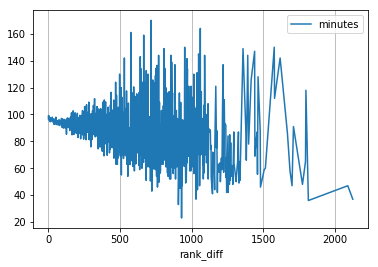

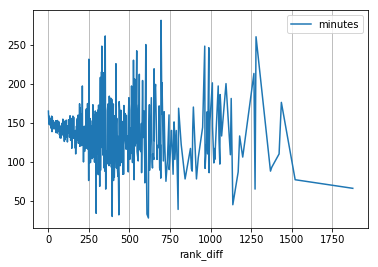

In [43]:
ATP["rank_diff"] = np.abs(ATP["winner_rank"] - ATP["loser_rank"])
ATP_bo3 = ATP[ATP['best_of'] == 3] # 76 906 matches
ATP_bo5 = ATP[ATP['best_of'] == 5] # 22 070 matches

ATP_ranking_bo3 = pd.pivot_table(ATP_bo3, values="minutes", columns="rank_diff").T
ATP_ranking_bo5 = pd.pivot_table(ATP_bo5, values="minutes", columns="rank_diff").T


fig1 = ATP_ranking_bo3.plot()
fig1.xaxis.grid(True)
fig2 = ATP_ranking_bo5.plot()
fig2.xaxis.grid(True)
plt.show()

There is an interesting trend here ! We can observe a few things :
- A global downwards trend.
- Both graph exhibit the same "zones" :
    - 1. First, a range where there is little variation and the trend is clear.
    - 2. Second, a range where there is a lot of variation but where the trend still holds.
    - 3. Outliers, the trend goes out the window.

For bo3s :  
- range 1.1 = [0, 150] (very little variation)  
- range 1.2 = [150, 400]  
- range 2 = [400, 1300]  
- range 3 = 1300+  

For bo5s :  
- range 1 = [0, 200]
- range 2 = [200, 800]  (admittedly, the trend isn't THAT clear here)
- range 3 = 800+  